<a href="https://colab.research.google.com/github/fakharzadehAmir/Face-Recognition/blob/main/FaceRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from sklearn.datasets import fetch_lfw_people

label_faces_wild = fetch_lfw_people(min_faces_per_person=10, download_if_missing=True)
label_faces_wild

{'data': array([[0.3869281 , 0.30457518, 0.3503268 , ..., 0.13725491, 0.14901961,
         0.15686275],
        [0.20784314, 0.32418302, 0.52156866, ..., 0.00653595, 0.01568628,
         0.02352941],
        [0.3529412 , 0.3267974 , 0.34248367, ..., 0.427451  , 0.4535948 ,
         0.51633984],
        ...,
        [0.05228758, 0.13594772, 0.22745098, ..., 0.29542485, 0.29281047,
         0.28235295],
        [0.3267974 , 0.3254902 , 0.32418302, ..., 0.7856209 , 0.74379086,
         0.74771243],
        [0.19738562, 0.2       , 0.28104576, ..., 0.08104575, 0.08104575,
         0.06143791]], dtype=float32),
 'images': array([[[0.3869281 , 0.30457518, 0.3503268 , ..., 0.37908497,
          0.3895425 , 0.40130723],
         [0.29673204, 0.3267974 , 0.46797386, ..., 0.38562095,
          0.39477125, 0.40784314],
         [0.27973858, 0.43529412, 0.5777778 , ..., 0.38823533,
          0.4039216 , 0.41437912],
         ...,
         [0.97908497, 0.8862745 , 0.6535948 , ..., 0.16862746,
     

54 Jacques Chirac
6 Andy Roddick
23 Colin Powell


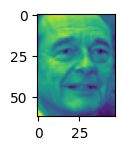

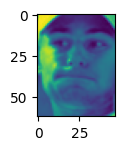

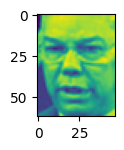

In [ ]:
def show_image(index):
  plt.figure(figsize=(1,6))
  p_id = label_faces_wild.target[index]
  print(p_id, label_faces_wild.target_names[p_id])
  plt.imshow(label_faces_wild.images[index])

show_image(0)
show_image(200)
show_image(1000)

In [ ]:
X = label_faces_wild.data
y = label_faces_wild.target
print(X.shape)
print(y.shape)

(4324, 2914)
(4324,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape

(3243, 2914)

In [ ]:
from keras import layers, models

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def calculate_metrics(model, x_test, y_test):
    predictions = model.predict(x_test)
    predicted_classes = np.argmax(predictions, axis=1)

    true_classes = y_test

    accuracy = accuracy_score(true_classes, predicted_classes)
    precision = precision_score(true_classes, predicted_classes, average='weighted', zero_division=0)
    recall = recall_score(true_classes, predicted_classes, average='weighted', zero_division=0)
    f1 = f1_score(true_classes, predicted_classes, average='weighted', zero_division=0)
    return accuracy, precision, recall, f1

In [ ]:
image_height, image_width = 62, 47

X_train = X_train.reshape((-1, image_height, image_width, 1))
X_test = X_test.reshape((-1, image_height, image_width, 1))


In [35]:
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, 1)),
    layers.BatchNormalization(),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.25),
    layers.Dense(len(label_faces_wild.target_names), activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_cnn = cnn_model.fit(X_train, y_train, epochs=30, validation_split=0.2)

Epoch 1/30
82/82 [==============================] - 9s 16ms/step - loss: 5.2404 - accuracy: 0.0509 - val_loss: 5.1733 - val_accuracy: 0.0000e+00
Epoch 2/30
82/82 [==============================] - 1s 11ms/step - loss: 4.5162 - accuracy: 0.1311 - val_loss: 5.6352 - val_accuracy: 0.0046
Epoch 3/30
82/82 [==============================] - 1s 11ms/step - loss: 3.9699 - accuracy: 0.1939 - val_loss: 6.1356 - val_accuracy: 0.0740
Epoch 4/30
82/82 [==============================] - 1s 11ms/step - loss: 3.6009 - accuracy: 0.2328 - val_loss: 6.2314 - val_accuracy: 0.1433
Epoch 5/30
82/82 [==============================] - 1s 11ms/step - loss: 3.1726 - accuracy: 0.2949 - val_loss: 5.8218 - val_accuracy: 0.1510
Epoch 6/30
82/82 [==============================] - 1s 14ms/step - loss: 2.8329 - accuracy: 0.3527 - val_loss: 4.9777 - val_accuracy: 0.1849
Epoch 7/30
82/82 [==============================] - 1s 14ms/step - loss: 2.5983 - accuracy: 0.3978 - val_loss: 3.8535 - val_accuracy: 0.2589
Epoch 8/3

In [36]:
print(calculate_metrics(cnn_model, X_test, y_test))

34/34 [==============================] - 0s 3ms/step
(0.6234967622571693, 0.6280888609645116, 0.6234967622571693, 0.59869213578667)


In [ ]:
label_faces_wild.target_names[:]

array(['Abdullah Gul', 'Adrien Brody', 'Alejandro Toledo', 'Alvaro Uribe',
       'Amelie Mauresmo', 'Andre Agassi', 'Andy Roddick',
       'Angelina Jolie', 'Ann Veneman', 'Anna Kournikova',
       'Ari Fleischer', 'Ariel Sharon', 'Arnold Schwarzenegger',
       'Atal Bihari Vajpayee', 'Bill Clinton', 'Bill Gates',
       'Bill McBride', 'Bill Simon', 'Britney Spears', 'Carlos Menem',
       'Carlos Moya', 'Catherine Zeta-Jones', 'Charles Moose',
       'Colin Powell', 'Condoleezza Rice', 'David Beckham',
       'David Nalbandian', 'Dick Cheney', 'Dominique de Villepin',
       'Donald Rumsfeld', 'Edmund Stoiber', 'Eduardo Duhalde',
       'Fidel Castro', 'George HW Bush', 'George Robertson',
       'George W Bush', 'Gerhard Schroeder', 'Gloria Macapagal Arroyo',
       'Gonzalo Sanchez de Lozada', 'Gordon Brown', 'Gray Davis',
       'Guillermo Coria', 'Halle Berry', 'Hamid Karzai', 'Hans Blix',
       'Harrison Ford', 'Hillary Clinton', 'Howard Dean', 'Hu Jintao',
       'Hugo Chave

1/1 [==============================] - 0s 23ms/step


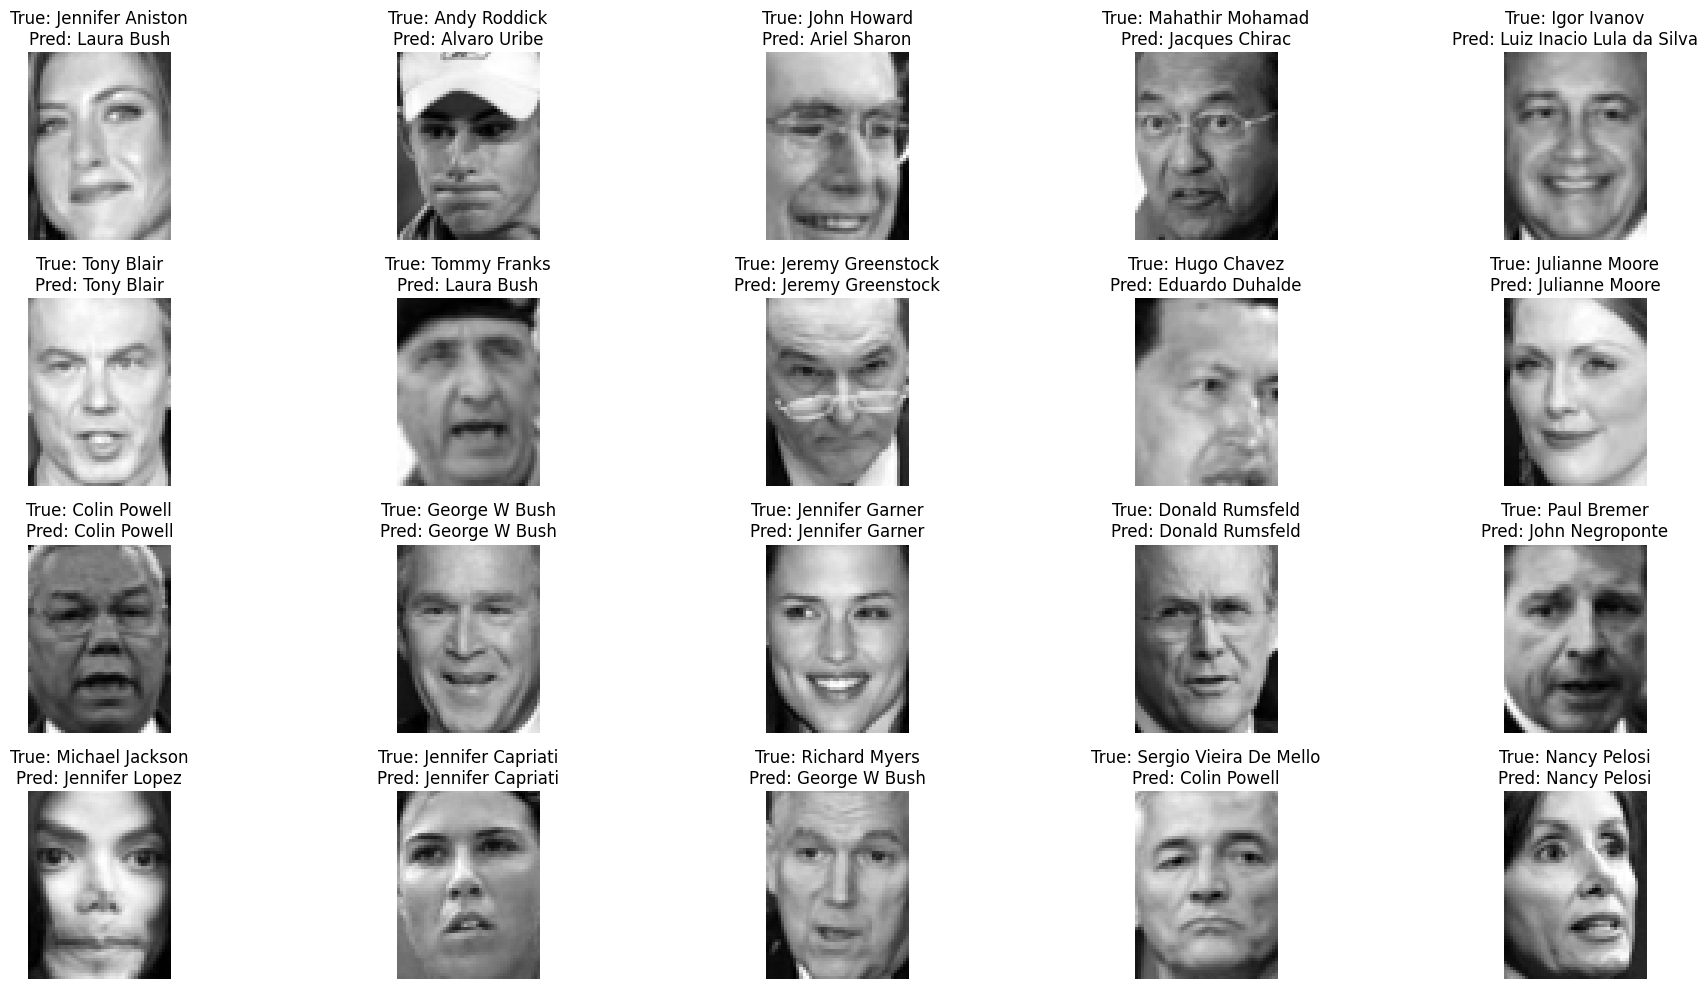

In [37]:
y_pred = np.argmax(cnn_model.predict(X_test[:20]), axis=1)
true_classes = y_test[:20]

fig, axs = plt.subplots(4, 5, figsize=(20, 10))

for i in range(20):
    ax = axs[i // 5, i % 5]
    ax.imshow(X_test[i].reshape(image_height, image_width), cmap='gray')

    true_label_name = label_faces_wild.target_names[true_classes[i]]
    predicted_label_name = label_faces_wild.target_names[y_pred[i]]

    ax.set_title(f"True: {true_label_name}\nPred: {predicted_label_name}")
    ax.axis('off')

plt.tight_layout()
plt.show()


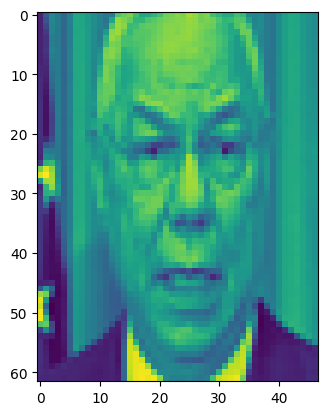

In [62]:
from PIL import Image
from tensorflow.keras.preprocessing import image
import numpy as np
from io import BytesIO
import requests

image_url = "https://ais.badische-zeitung.de/piece/0c/43/24/fc/205726972-h-720.jpg"
response = requests.get(image_url)
img = Image.open(BytesIO(response.content))
img = img.resize((47, 62))
img_gray = img.convert('L')
img_array = image.img_to_array(img_gray) / 255.0
img_batch = np.expand_dims(img_array, axis=0)
plt.imshow(img_gray)

In [63]:
predictions = cnn_model.predict(img_batch)
predicted_class = np.argmax(predictions[0])
print("Predicted class (cnn):", label_faces_wild.target_names[predicted_class])

1/1 [==============================] - 0s 20ms/step
Predicted class (cnn): Colin Powell
